### 1-Read Dataset

In [57]:
# import libarary
import pandas as pd 
import numpy as np 

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# read data
data=pd.read_csv(r'D:\ML project & tasks/car_evaluation.csv')

In [60]:
# display first 5 row of data
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 2-Data Exploration

In [61]:
# display shape of data
data.shape

(1727, 7)

In [62]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [63]:
# display name of columns
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [64]:
# change name of columns
cols_name=['buying','maint','doors','person','lug_boot','safety','class']

In [65]:
data.columns=cols_name

In [66]:
data.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [67]:
for i in cols_name:
    print(data[i].value_counts())
    print('--'*40)

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------------------------------------
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------------------------------------
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
--------------------------------------------------------------------------------
person
4       576
more    576
2       575
Name: count, dtype: int64
--------------------------------------------------------------------------------
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
--------------------------------------------------------------------------------
safety
med     576
high    576
low     575
Name: count, dtype: int64
--------------------------------------------------------------------------------
class
unacc    1209
acc       384
good       69
v

In [68]:
for i in cols_name:
    print(f"column name : {i}")
    print(data[i].unique())
    print('--'*40)

column name : buying
['vhigh' 'high' 'med' 'low']
--------------------------------------------------------------------------------
column name : maint
['vhigh' 'high' 'med' 'low']
--------------------------------------------------------------------------------
column name : doors
['2' '3' '4' '5more']
--------------------------------------------------------------------------------
column name : person
['2' '4' 'more']
--------------------------------------------------------------------------------
column name : lug_boot
['small' 'med' 'big']
--------------------------------------------------------------------------------
column name : safety
['med' 'high' 'low']
--------------------------------------------------------------------------------
column name : class
['unacc' 'acc' 'vgood' 'good']
--------------------------------------------------------------------------------


In [69]:
# check missing values
data.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [70]:
# check duplicated
data.duplicated().sum()

0

In [71]:
# describe of data
np.round(data.describe(),2)

,buying,maint,doors,person,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### 3-Data visualization

In [72]:
# import libarary
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

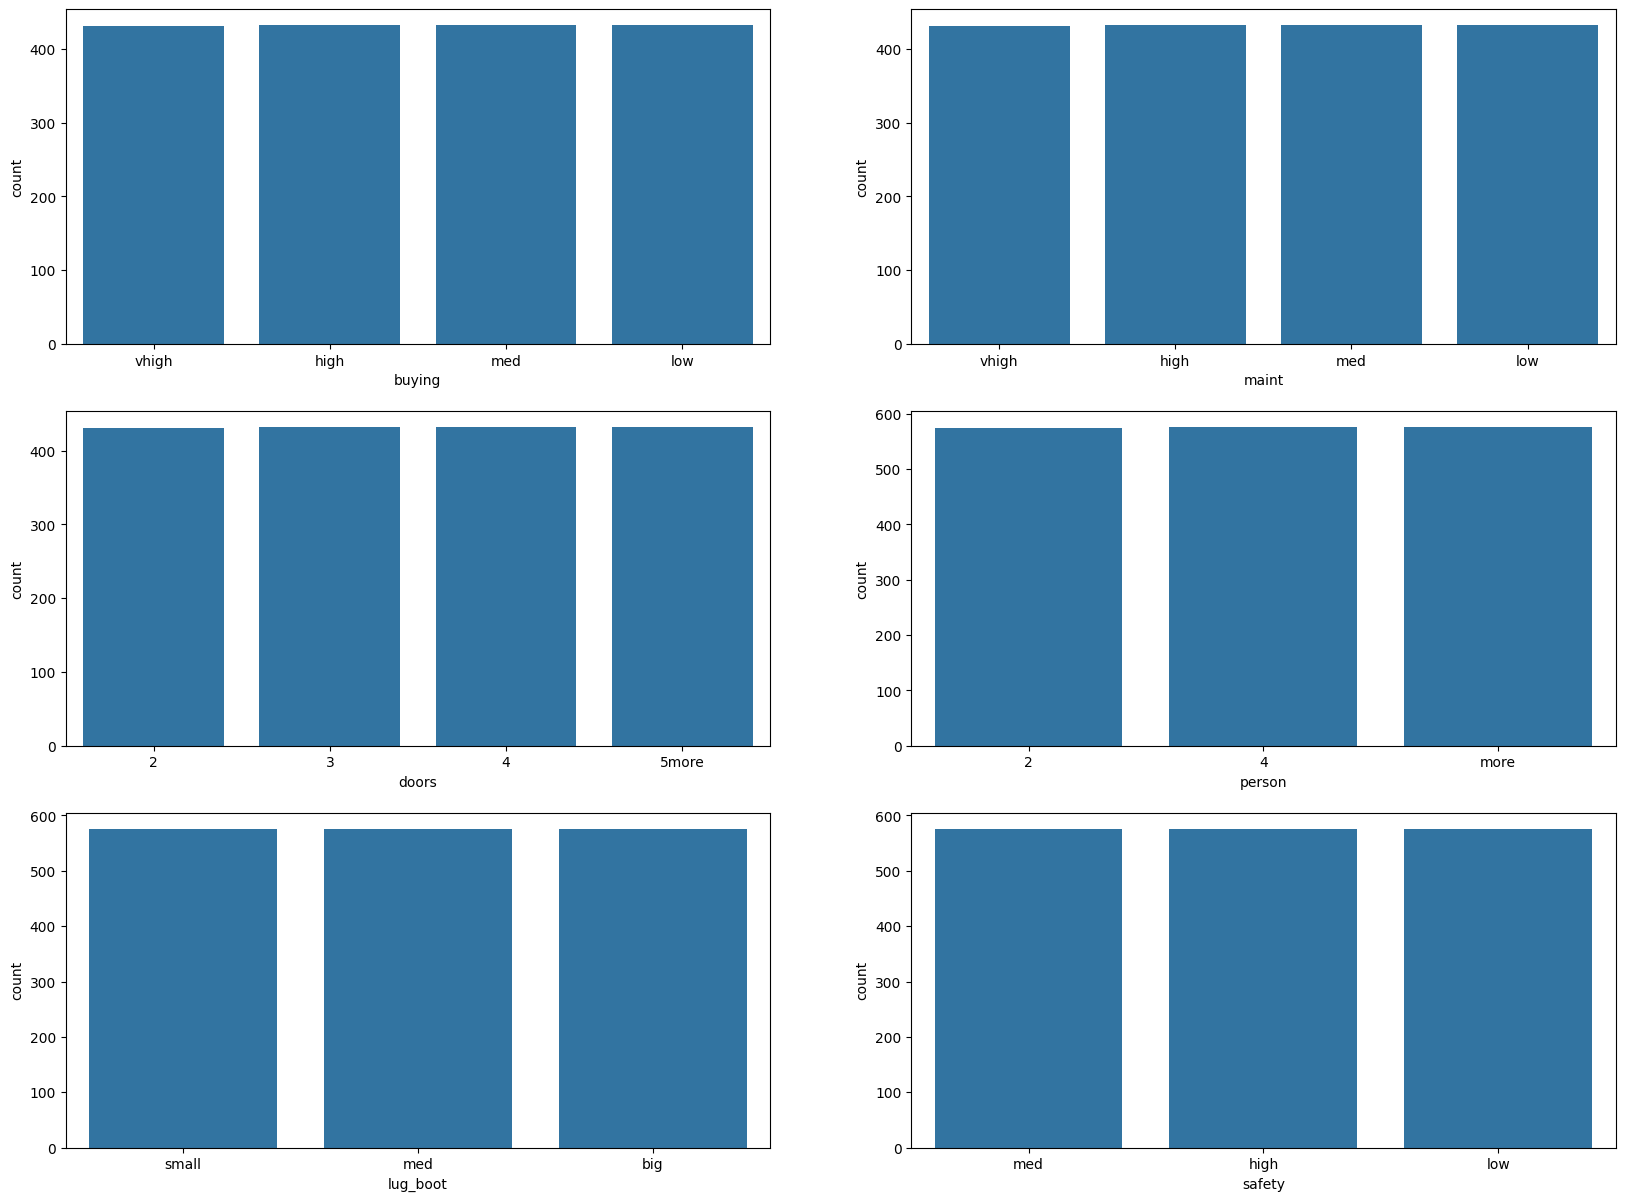

In [73]:
# use boxplot to explore outlier
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(x=data['buying'])

plt.subplot(4,2,2)
sns.countplot(x=data['maint'])

plt.subplot(4,2,3)
sns.countplot(x=data['doors'])

plt.subplot(4,2,4)
sns.countplot(x=data['person'])

plt.subplot(4,2,5)
sns.countplot(x=data['lug_boot'])

plt.subplot(4,2,6)
sns.countplot(x=data['safety'])

plt.show()


### 4-Data Preprocessing

In [74]:
# split data into feature(x) and label(y)
x=data.drop(['class'],axis=1)
y=data['class']

In [75]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [76]:
# encoding data
import category_encoders as ce

In [77]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','person','lug_boot','safety'])

In [78]:
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

### 5-Build Model

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
# calling model
dt=DecisionTreeClassifier()

In [81]:
# fit model on train data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
# predict model
y_pred=dt.predict(x_test)

In [83]:
print('first 10 value of y predict =',y_pred[:10])
print(' ')
print('first 10 value of y actual =',y_test.values[:10])

first 10 value of y predict = ['unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc']
 
first 10 value of y actual = ['unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc']


In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



In [86]:
cm=confusion_matrix(y_test,y_pred)

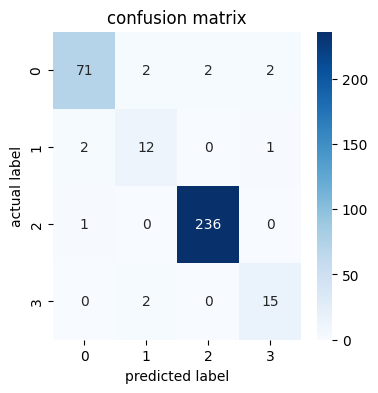

In [87]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

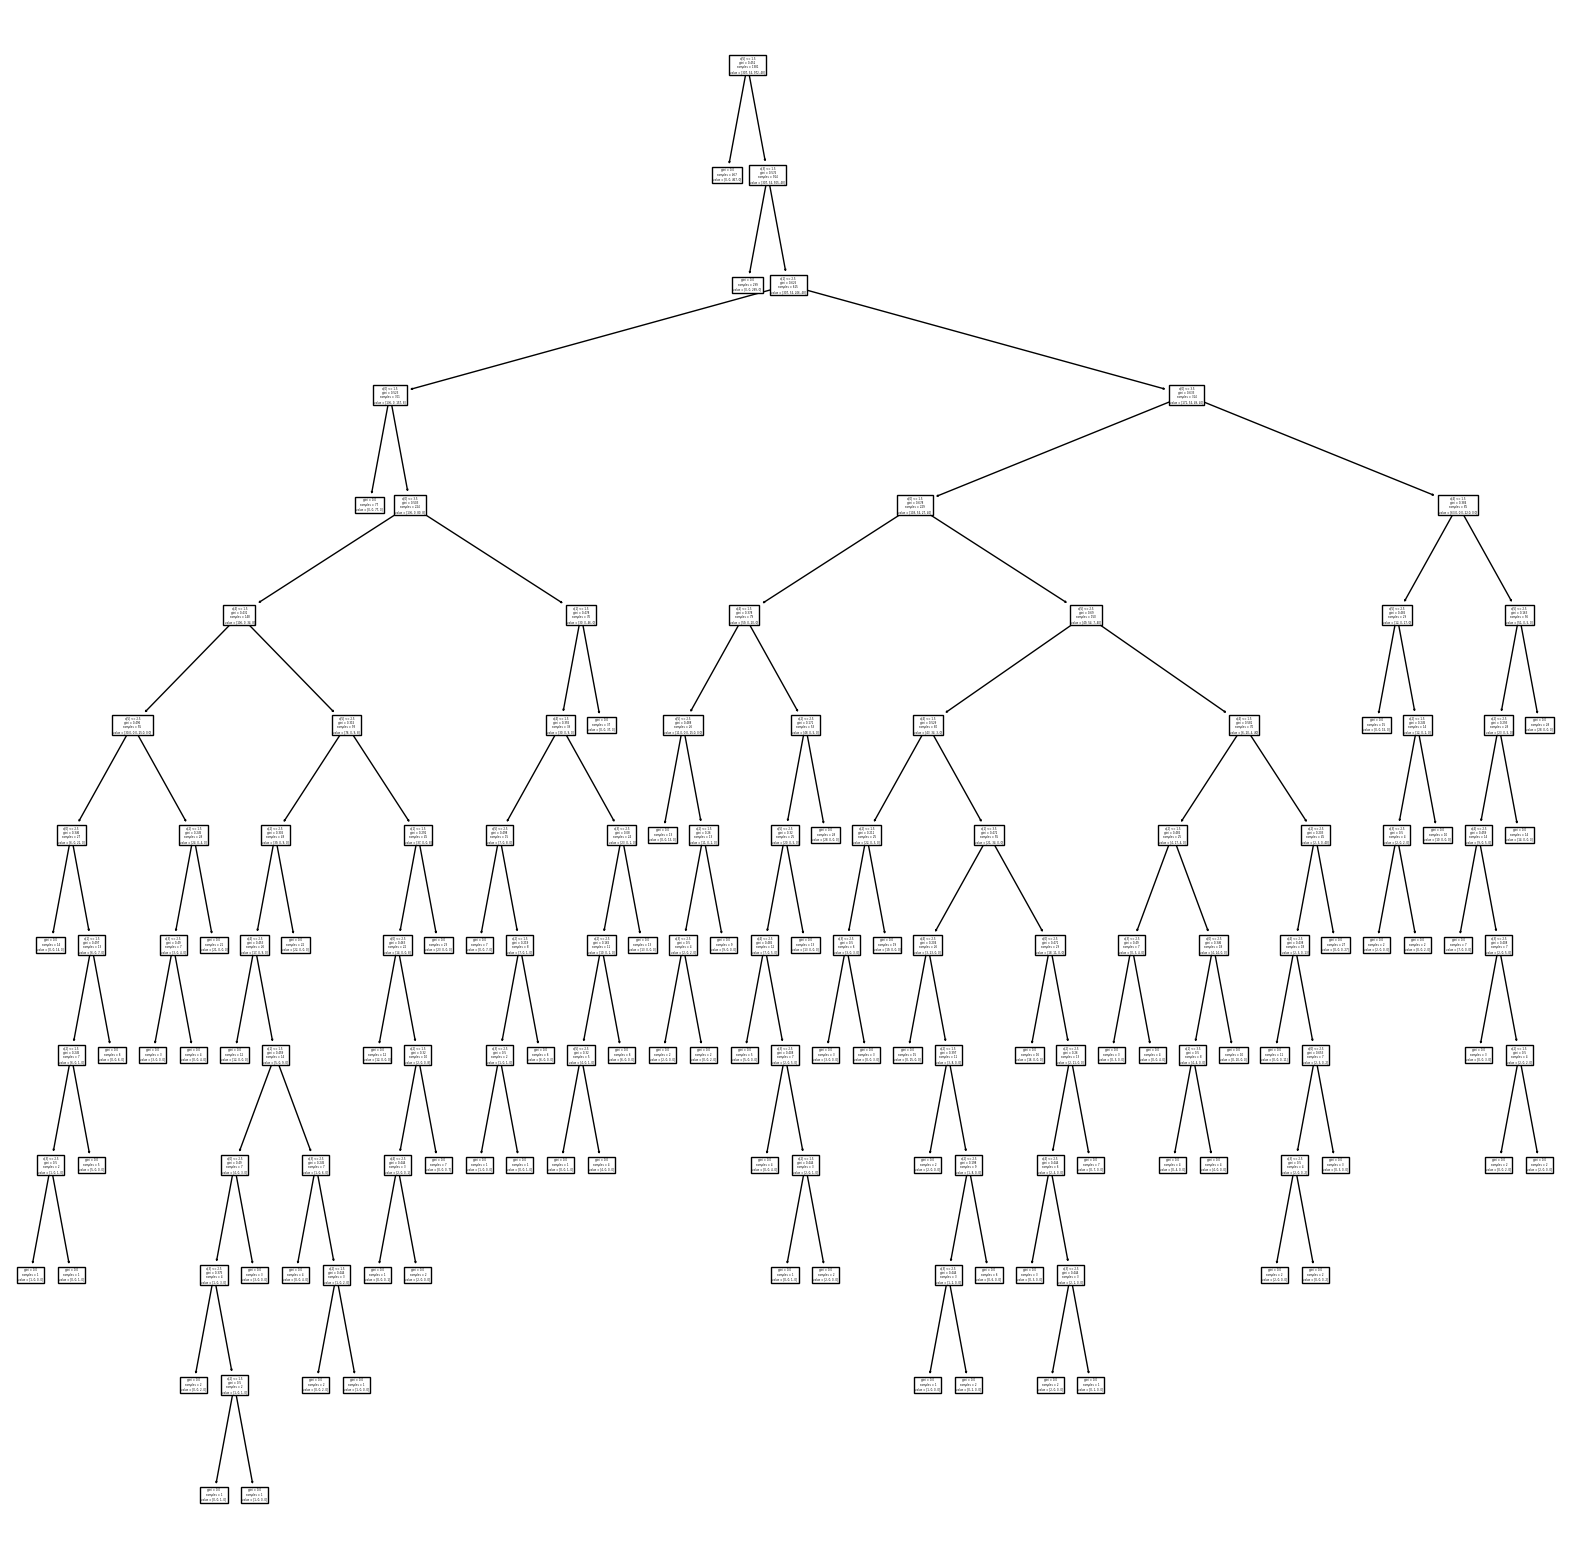

In [88]:
# plot tree of data
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt.fit(x_train,y_train))
plt.show()

In [89]:
# use grid_search to show best parameters
from sklearn.model_selection import GridSearchCV

In [90]:
params={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[5,10,20,30],
    'min_samples_split':list(range(1,10)),
    'min_samples_leaf':list(range(1,10))
}

In [91]:
grid =GridSearchCV(estimator=dt,param_grid=params,scoring='accuracy')

In [92]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [93]:
# print best params
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [94]:
# print score
print(grid.best_score_)

0.9760974206037776


In [95]:
# calling model on best params
dt_model=DecisionTreeClassifier(criterion= 'log_loss', max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')

In [96]:
# fit model on train data
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=30)

In [97]:
# predict model
y_pred_model=dt_model.predict(x_test)

In [98]:
print(classification_report(y_test,y_pred_model))

              precision    recall  f1-score   support

         acc       0.96      0.95      0.95        77
        good       0.75      0.80      0.77        15
       unacc       1.00      1.00      1.00       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



In [99]:
# predict on train data
y_pred_train=dt_model.predict(x_train)

In [100]:
# classification_report on train data
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       307
        good       1.00      1.00      1.00        54
       unacc       1.00      1.00      1.00       972
       vgood       1.00      1.00      1.00        48

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381

